# CS2 Inferno Update

Update the inferno map to include Z coordinates as well

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from awpy import Demo

In [2]:
nodes = pd.read_csv('../../../data/map_graph_model/de_inferno/nodes.csv')

In [3]:
files = [
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-astralis-vs-virtuspro-bo3-MPKVFectLYZpY_brKJhH1sastralis-vs-virtus-pro-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-saw-bo3-ESSTYxFkvaG2Ij-q_tbYfkfaze-vs-saw-m2-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-vitality-bo3-lQLvdLlJcL7dI4fNDLSZOXfaze-vs-vitality-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-saw-vs-astralis-bo3-CVFySu5vH0SDxuYWfQA4dZsaw-vs-astralis-m2-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-vitality-vs-g2-bo3-07R4CPOHu_IwXUW--CcGcfvitality-vs-g2-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-vitality-vs-virtuspro-bo3-XYGQpZFqp_2Cviy1kmkwv9vitality-vs-virtuspro-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-groups-2024-astralis-vs-vitality-bo3-UVXuhGRpS9h-3nbFLvdUIaastralis-vs-vitality-m1-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-groups-2024-g2-vs-natus-vincere-bo3-YNZzdluz2vLlZbsmgT1lX3g2-vs-natus-vincere-m2-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-groups-2024-gamerlegion-vs-faze-bo3-0R-skvX2qTBESZVM21Uryvgamerlegion-vs-faze-m3-inferno.dem',
    '../../../data/matches-raw/cs2/2024/_blast-premier-spring-groups-2024-natus-vincere-vs-g2-bo3-ZX5miZ6d1IQGq7f25A2Ph-natus-vincere-vs-g2-m1-inferno.dem',
]

pos = None

for idx, file in enumerate(files):
    if idx == 0:
        pos = Demo(file).ticks[['X', 'Y', 'Z']]
        pos.round(0)
        pos = pos.drop_duplicates()
    else:
        pos = pd.concat([pos, Demo(file).ticks[['X', 'Y', 'Z']]])
        pos.round(0)
        pos = pos.drop_duplicates()
    print(f'Processed {file}')
        

Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-astralis-vs-virtuspro-bo3-MPKVFectLYZpY_brKJhH1sastralis-vs-virtus-pro-m1-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-saw-bo3-ESSTYxFkvaG2Ij-q_tbYfkfaze-vs-saw-m2-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-faze-vs-vitality-bo3-lQLvdLlJcL7dI4fNDLSZOXfaze-vs-vitality-m1-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-saw-vs-astralis-bo3-CVFySu5vH0SDxuYWfQA4dZsaw-vs-astralis-m2-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-vitality-vs-g2-bo3-07R4CPOHu_IwXUW--CcGcfvitality-vs-g2-m1-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-final-2024-vitality-vs-virtuspro-bo3-XYGQpZFqp_2Cviy1kmkwv9vitality-vs-virtuspro-m1-inferno.dem
Processed ../../../data/matches-raw/cs2/2024/_blast-premier-spring-groups-202

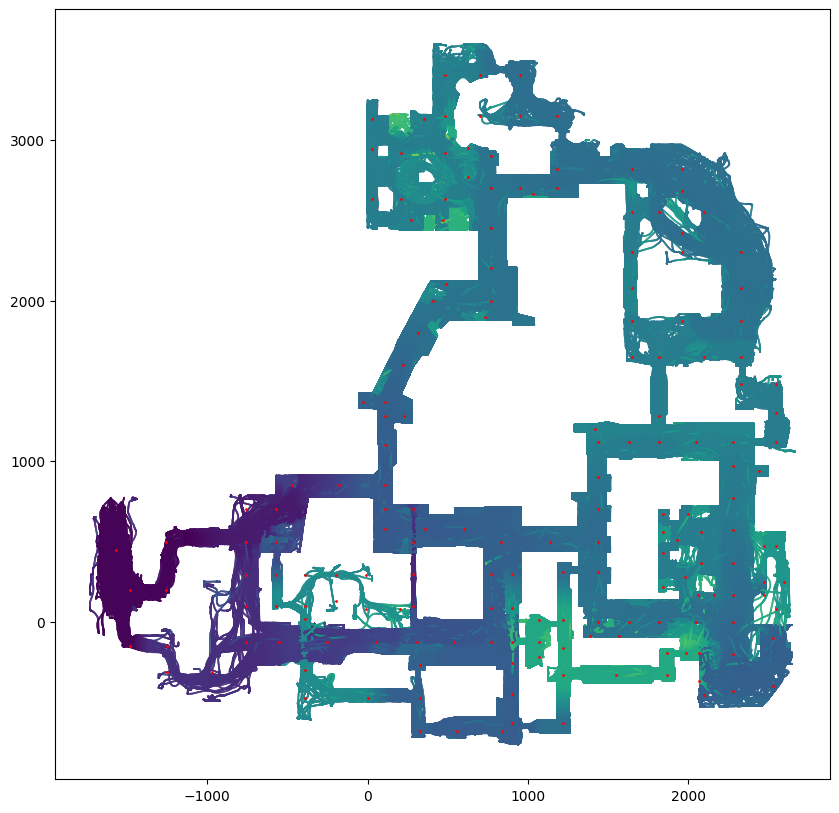

In [6]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(pos['X'], pos['Y'], s=0.1, c=pos['Z'])
plt.scatter(nodes['x'], nodes['y'], s=1, c='red')